In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
#only get Data analyst jobs in the US

df_US_data = df[(df['job_title_short']== 'Data Analyst')&(df['job_country']=='United States')].copy()
df_US_data=df_US_data.dropna(subset=['salary_year_avg'])


Text(0, 0.5, 'Number of Jobs')

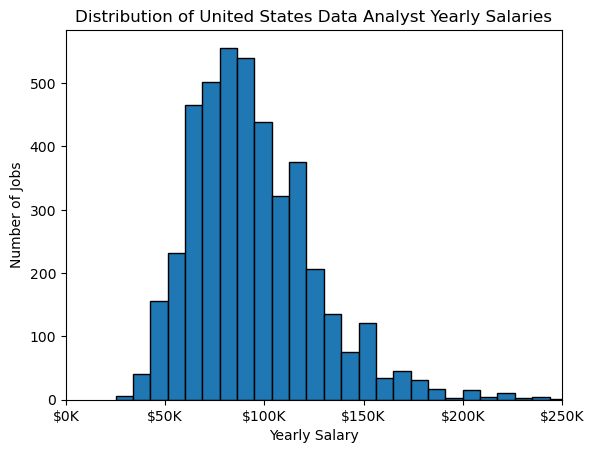

In [ ]:

df_US_data['salary_year_avg'].plot(kind='hist',bins=40, edgecolor='black')
plt.xlim(0,250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

In [11]:
df_DS = df[df['job_title_short']=='Data Scientist'].copy()

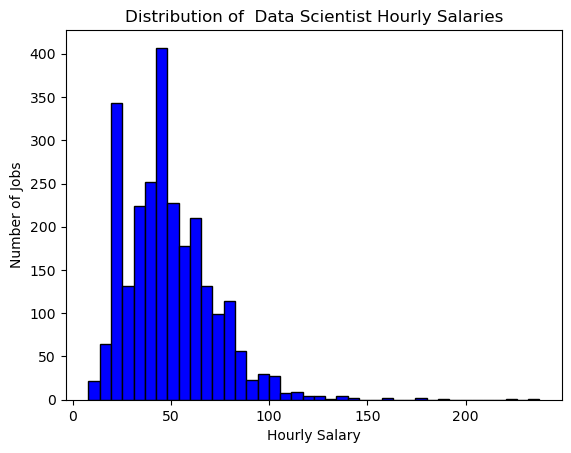

In [ ]:
df_DS = df_DS.dropna(subset=['salary_hour_avg'])
df_DS['salary_hour_avg'].plot(kind='hist',bins=40,color='blue',edgecolor='black')

plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of  Data Scientist Hourly Salaries')
plt.show()

In [21]:
df_skills = df.dropna(subset=['job_skills']).copy()

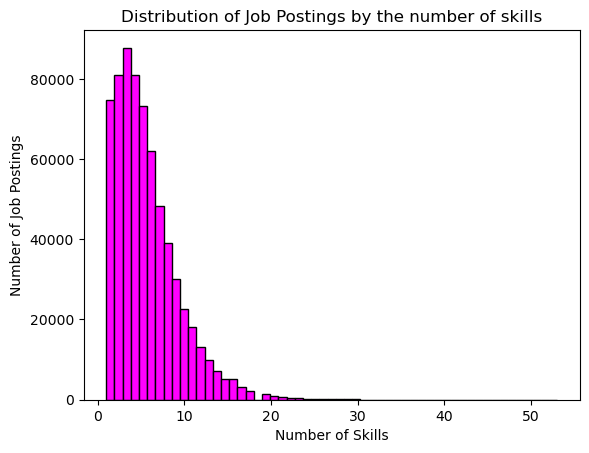

In [24]:
df_skills['num_skills'] = df_skills['job_skills'].apply(len)
df_skills['num_skills'].plot(kind='hist',bins=55,color='magenta',edgecolor='black')
plt.title('Distribution of Job Postings by the number of skills')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.show()



In [25]:
df_DE = df[df['job_title_short']=='Data Engineer'].copy()
df_DE=df_DE.dropna(subset=['salary_year_avg'])

In [26]:
mean_salary =df_DE['salary_year_avg'].mean()
median_salary =df_DE['salary_year_avg'].median()


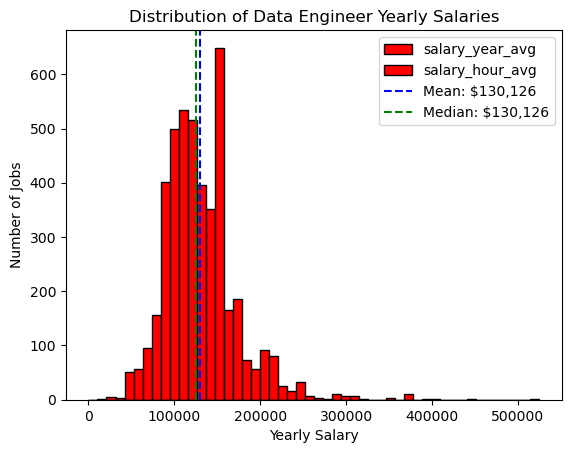

In [33]:
df_DE.plot(kind='hist',bins=50,color='red',edgecolor='black')
plt.axvline(mean_salary,color='blue',linestyle='dashed',label= f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary,color='green',linestyle='dashed',label= f'Median: ${mean_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()

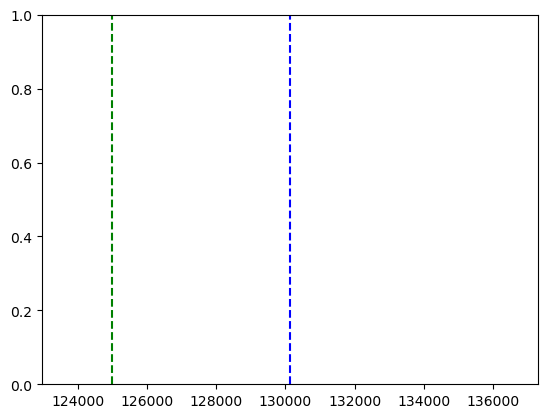

In [31]:
plt.axvline(mean_salary,color='blue',linestyle='dashed',label= f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary,color='green',linestyle='dashed',label= f'Median: ${mean_salary:,.0f}')
          